In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D
from scipy.stats import chi2_contingency

## Build a general graph with the resulting relationships

In [2]:
all_nmd_escape_final = pd.read_csv("data/all_nmd_escape_final.csv")
all_nmd_undergo_final = pd.read_csv("data/all_nmd_undergo_final.csv")

In [3]:
all_nmd = pd.concat([all_nmd_escape_final, all_nmd_undergo_final], ignore_index=True)

In [4]:
cross_tab_all = pd.crosstab([all_nmd['NMD_escape'], all_nmd['Significance']], all_nmd['Codon_position'])
print(cross_tab_all)

Codon_position              1    2    3
NMD_escape Significance                
NO         benign        2396  301  322
           pathogenic    1914  517  588
YES        benign         378   77   64
           pathogenic     335   98   86


In [5]:
chi2, p_value, _, _ = chi2_contingency(cross_tab_all)
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p_value}")

Chi-squared value: 204.19513710261197
P-value: 2.4271525312413263e-41


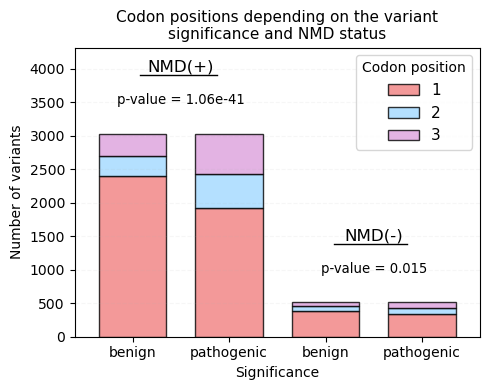

In [6]:
custom_colors = ['#f08080', '#a1d9ff', '#dda0dd']

fig, ax = plt.subplots(figsize=(5, 4))
cross_tab_all.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1, width=0.7, color=custom_colors, ax=ax)

plt.title('Codon positions depending on the variant\nsignificance and NMD status', fontsize=11)
plt.xlabel('Significance', fontsize=10)
plt.ylabel('Number of variants', fontsize=10)

labels = cross_tab_all.index.get_level_values('Significance')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, fontsize=10)

plt.yticks(fontsize=10)
plt.legend(title='Codon position', fontsize=11, loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.1)

plt.ylim(top=cross_tab_all.max().max() * 1.8)

max_value = cross_tab_all.max().max()
plt.text(0.5, max_value * 1.65, 'NMD(+)', fontsize=12, ha='center')
plt.text(0.5, max_value * 1.45, 'p-value = 1.06e-41', fontsize=9.5, ha='center')
plt.text(2.5, max_value * 0.6, 'NMD(-)', fontsize=12, ha='center')
plt.text(2.5, max_value * 0.4, 'p-value = 0.015', fontsize=9.5, ha='center')

plt.axhline(y=max_value * 1.63, xmin=0.35, xmax=0.16, color='black', linewidth=1)
plt.axhline(y=max_value * 0.58, xmin=0.64, xmax=0.82, color='black', linewidth=1)

plt.tight_layout()
plt.savefig('images/final_plot.png', dpi=300)
plt.show()

In [7]:
pat_escape_variants = all_nmd_escape_final.loc[all_nmd_escape_final['Significance'] == 'pathogenic']
ben_escape_variants = all_nmd_escape_final.loc[all_nmd_escape_final['Significance'] == 'benign']

pat_stop_codon_percent = pat_escape_variants['Stop_Codon'].value_counts(normalize=True) * 100
ben_stop_codon_percent = ben_escape_variants['Stop_Codon'].value_counts(normalize=True) * 100

stop_codon_df_escape = pd.DataFrame({
    'Pathogenic': pat_stop_codon_percent,
    'Benign': ben_stop_codon_percent
}).reset_index().rename(columns={'index': 'Stop_Codon'})

In [8]:
pat_undergo_variants = all_nmd_undergo_final.loc[all_nmd_undergo_final['Significance'] == 'pathogenic']
ben_undergo_variants = all_nmd_undergo_final.loc[all_nmd_undergo_final['Significance'] == 'benign']

pat_stop_codon_percent = pat_undergo_variants['Stop_Codon'].value_counts(normalize=True) * 100
ben_stop_codon_percent = ben_undergo_variants['Stop_Codon'].value_counts(normalize=True) * 100

stop_codon_df_undergo = pd.DataFrame({
    'Pathogenic': pat_stop_codon_percent,
    'Benign': ben_stop_codon_percent
}).reset_index().rename(columns={'index': 'Stop_Codon'})

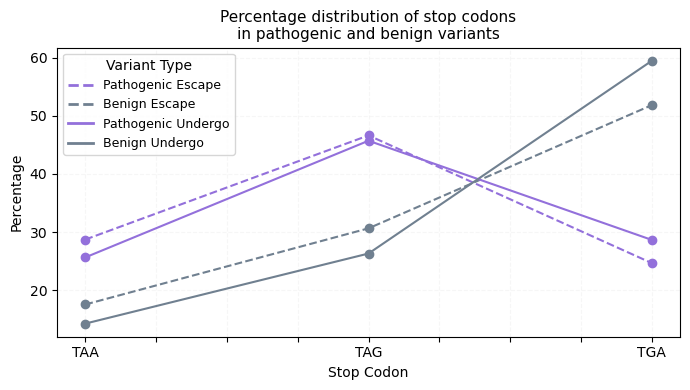

In [64]:
colors = ['mediumpurple', 'slategrey']

fig, ax = plt.subplots(figsize=(7, 4))

stop_codon_df_escape.plot(kind='line', x='Stop_Codon', marker='o', linestyle='--', color=colors, ax=ax)
stop_codon_df_undergo.plot(kind='line', x='Stop_Codon', marker='o', linestyle='-', color=colors, ax=ax)

custom_lines = [Line2D([0], [0], color='mediumpurple', lw=2, linestyle='--'),
                Line2D([0], [0], color='slategrey', lw=2, linestyle='--'),
                Line2D([0], [0], color='mediumpurple', lw=2, linestyle='-'),
                Line2D([0], [0], color='slategrey', lw=2, linestyle='-')]

ax.legend(custom_lines, ['Pathogenic Escape', 'Benign Escape', 'Pathogenic Undergo', 'Benign Undergo'], 
          title='Variant Type', fontsize=9, title_fontsize=10)

plt.title('Percentage distribution of stop codons\nin pathogenic and benign variants', fontsize=11)
plt.xlabel('Stop Codon', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.1)
plt.tight_layout()

plt.savefig('images/combined_line_plot_stops_distr.png', dpi=300)
plt.show()


In [36]:
all_nmd['Codon_change'] = list(zip(all_nmd['Codon'], all_nmd['Stop_Codon']))  # to avoid str type
codon_change_percent = all_nmd['Codon_change'].value_counts(normalize=True) * 100

In [37]:
codon_change_percent_df = codon_change_percent.reset_index()
codon_change_percent_df.columns = ['Codon_change', 'Percentage']

codon_change_percent_df['Codon'] = codon_change_percent_df['Codon_change'].apply(lambda x: x[0])
codon_change_percent_df['Stop_Codon'] = codon_change_percent_df['Codon_change'].apply(lambda x: x[1])

pivot_df = codon_change_percent_df.pivot_table(values='Percentage', index='Codon', columns='Stop_Codon', fill_value=0)

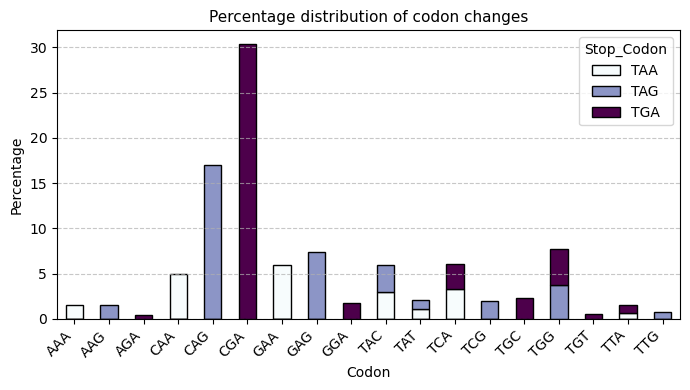

In [63]:
fig, ax = plt.subplots(figsize=(7, 4))
pivot_df.plot(kind='bar', stacked=True, ax=ax, colormap='BuPu', edgecolor='black')

plt.title('Percentage distribution of codon changes', fontsize=11)
plt.xlabel('Codon', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('images/codon_change_distribution_stacked.png', dpi=300)

plt.show()